In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from geospatial0516 import *

In [78]:
# Segment & Polygon intersection


# Function: create segments list (of points pair) based on points in polygon
def get_seg_from_pol(pol):
    pol_seg = []
    for i in range(0, (pol.size-1)):
        pol_seg.append(Segment(pol.points[i], pol.points[i+1]))
    pol_seg.append(Segment(pol.points[pol.size-1], pol.points[0]))
    return pol_seg

# Function: calculate the intersection point of two segments which intersects
def get_intersect_point(seg1, seg2):
    A1 = seg1.end.y - seg1.start.y
    B1 = seg1.start.x - seg1.end.x
    C1 = seg1.end.x * seg1.start.y - seg1.start.x * seg1.end.y
    A2 = seg2.end.y - seg2.start.y
    B2 = seg2.start.x - seg2.end.x
    C2 = seg2.end.x * seg2.start.y - seg2.start.x * seg2.end.y
    x = (C2 * B1 - C1 * B2)/(A1 * B2 - A2 * B1)
    y = (C1 * A2 - C2 * A1)/(A1 * B2 - A2 * B1)
    return Point(x, y)

# Function: check if one segment touches the other if they already intersects, True is touch, False if intersection
def check_touch(seg1, seg2):
    if (seg1.start == seg2.start) or (seg1.start == seg2.end) or (seg1.end == seg2.start) or (seg1.end == seg2.end):
        return True
    elif (seg1.start.x == seg1.end.x) and ((seg1.start.x == seg2.start.x) or (seg1.start.x == seg2.end.x)):
        return True
    elif (seg2.start.x == seg2.end.x) and ((seg2.start.x == seg1.start.x) or (seg2.start.x == seg1.end.x)):
        return True
    elif (seg1.start.x != seg1.end.x) and (seg2.start.x != seg2.end.x):
        f1 = (seg1.end.y - seg1.start.y)/(seg1.start.x - seg1.end.x)
        f2 = (seg2.end.y - seg2.start.y)/(seg2.start.x - seg2.end.x)
        if f1 == f2:
            return True
        else:
            A1 = seg1.end.y - seg1.start.y
            B1 = seg1.start.x - seg1.end.x
            C1 = seg1.end.x * seg1.start.y - seg1.start.x * seg1.end.y
            A2 = seg2.end.y - seg2.start.y
            B2 = seg2.start.x - seg2.end.x
            C2 = seg2.end.x * seg2.start.y - seg2.start.x * seg2.end.y
            if (seg2.start.x*A1 + seg2.start.y*B1 + C1 == 0) or (seg2.end.x*A1 + seg2.end.y*B1 + C1 == 0) or (seg1.start.x*A2 + seg1.start.y*B2 + C2 == 0) or (seg1.end.x*A2 + seg1.end.y*B2 + C2 == 0):
                return True
            else:
                return False
    else:
        return False
    
    
    
# Function: sorting points group
def sorting_PointGroup(pointgroup):
    n = len(pointgroup)
    xlist = []
    ylist = []
    for i in range(0, n):
        xlist.append(pointgroup[i].x)
        ylist.append(pointgroup[i].y)
    xy = pd.DataFrame()
    xy['x'] = xlist
    xy['y'] = ylist
    xy.sort_values(by=['x', 'y'], inplace = True)
    xy.reset_index(drop = True, inplace = True)
    pointgroup_sorted = []
    for j in range(0, n):
        pointgroup_sorted.append(Point(xy['x'][j], xy['y'][j]))
    print("done")
    print(pointgroup_sorted)
    return pointgroup_sorted


# The algorithm that works for concave hull also works for convex hull, 
# so it's not necessary to differeniate between convex and concave hull at the beginning.

# Function: Check if one segment intersects with one polygon or not and calculate the overlapping length
## Notice: Touching the edge of polygon is not considered as intersection in the following lines
def inter_seg_pol(seg, pol):
    print(seg)
    # print(pol)
    
    # Create ordered segments from polygon
    segments_list = get_seg_from_pol(pol)
    
    # Prepare intersection segments list
    int_seg = []
    for i in range(1, pol.size):
        int_seg.append(seg.intersects(segments_list[i]))
    
    ## The segment has no intersection with edges of the polygon
    print("1 if")
    if set(int_seg) == {False}:
        ### The two points of the segment are both outside the polygon - No Need for further calculation
        print("2 if")
        if (pol.containsPoint(seg.start) == False) and (pol.containsPoint(seg.end) == False):
            length = 0
            print(f"\nThe intersection length is: {length:.2f}")
        ### The two points of the segment are both inside the polygon
        print("3 if")
        if (pol.containsPoint(seg.start) == True) and (pol.containsPoint(seg.end) == True):
        #### Calculate the length of the segment
            length = seg.length
            print(f"\nThe intersection length is: {length:.2f}")
    # print("4 if")
    ## The segment has intersection with edges of the polygon
    else:
        print(int_seg)
        for i in range(1, len(int_seg)):
            # Find the edges which the segment intersects with
            print("5 if")
            if int_seg[i] == True:
                print(int_seg[i])
                print("6 if")
                # Check whether it is a touch or not
                print(check_touch(seg, segments_list[i]))
                if check_touch(seg, segments_list[i]) == False:
                    point_i = []
                    # Find the intersecting point and store it in a list
                    point_i.append(get_intersect_point(seg, segments_list[i]))
                    point_i.append(seg.start)
                    point_i.append(seg.end)
                    print(point_i)
                    point_i = sorting_PointGroup(point_i)
                    n = len(point_i)
                    seg_i = []
                    length_i = []
                    print(segments_list[i])
                    for j in range(1, (n-1)):
                        seg_i.append(Segment(point_i[j-1], point_i[j]))
                    # Check if the center of the segments lie inside or outside the polygon
                        p_i_m = Point(point_i[j-1], point_i[j])
                        if pol.containsPoint(p_i_m) == True:
                            length_i.append((Segment(point_i[j-1], point_i[j])).length)
                        else:
                            print('no intersected intersection')
                    length = sum(length_i)
                    print(f"\nThe intersection length is: {length:.2f}")                                       
                else:
                    print('done')
            else:
                print('done !')
            
            
         
                
    
    
    
    
    
    #### Store all the intersecting point and create new segments
    #### Check if the the center point of the segment lie inside or outside the polygon for each segment
    #### Calculate the total length of the segments which its center lies inside the polygon
    
    



In [56]:
# Plot function for segments
def pS(seg):    
    x1 = [seg.start.x, seg.end.x]
    y1 = [seg.start.y, seg.end.y]
    plt.plot(x1, y1, linestyle="dashed", marker="o")
    plt.show()
def pSS(seg1, seg2):
    x1 = [seg1.start.x, seg1.end.x]
    y1 = [seg1.start.y, seg1.end.y]
    plt.plot(x1, y1, linestyle="dashed", marker="o")
    x2 = [seg2.start.x, seg2.end.x]
    y2 = [seg2.start.y, seg2.end.y]
    plt.plot(x2, y2, linestyle="dashed", marker="o")
    plt.show()
# Plot function for polygons
def pP(pol):
    xs = [i.x for i in pol]
    ys = [i.y for i in pol]
    plt.plot(xs, ys, linestyle='dashed')
    plt.show()

def plot_sp(seg, pol):
    xs = [i.x for i in pol]
    ys = [i.y for i in pol]
    plt.plot(xs, ys, linestyle='dashed')
    x1 = [seg.start.x, seg.end.x]
    y1 = [seg.start.y, seg.end.y]
    plt.plot(x1, y1, linestyle="dashed", marker="o")
    plt.show()

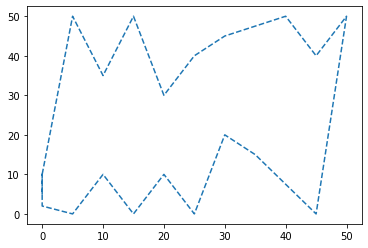

In [57]:
# Sample polygon (random points for the outline of England)
data_p = [[0,5],[0,10],[0,2],[5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35], [5, 50],[5,50], [0, 10]]
samplePolygon = Polygon(data_p, xcol=0, ycol=1)
xs = [i.x for i in samplePolygon]
ys = [i.y for i in samplePolygon]
plt.plot(xs, ys, linestyle='dashed')


Segment with start Point(x=0.00, y=20.00) and end Point(x=0.00, y=30.00).
1 if
2 if
3 if

The intersection length is: 10.00


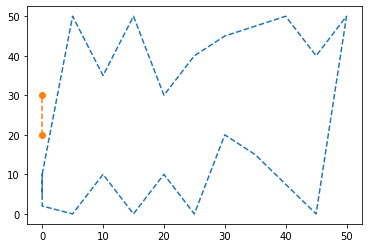

In [58]:
seg1 = Segment(Point(0,20), Point(0,30))
inter_seg_pol(seg1, samplePolygon)
plt.plot(xs, ys, linestyle='dashed')
pS(seg1)

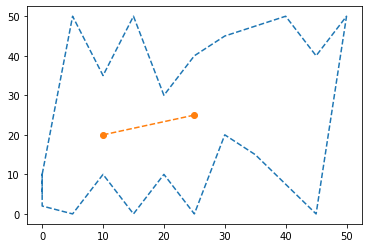

In [59]:
seg2 = Segment(Point(10,20), Point(25,25))
plt.plot(xs, ys, linestyle='dashed')
pS(seg2)

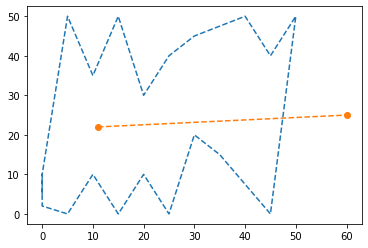

True
False


In [60]:
pol = samplePolygon
segt = Segment(Point(11,22), Point(60,25))
plot_sp(segt, pol)
print(pol.containsPoint(segt.start))
print(pol.containsPoint(segt.end))

In [79]:
inter_seg_pol(segt, pol)

Segment with start Point(x=11.00, y=22.00) and end Point(x=60.00, y=25.00).
1 if
[False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False]
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
True
6 if
False
[Point(x=29.58, y=23.14), Point(x=11.00, y=22.00), Point(x=60.00, y=25.00)]
done
[Point(x=11.00, y=22.00), Point(x=29.58, y=23.14), Point(x=60.00, y=25.00)]
Segment with start Point(x=35.00, y=15.00) and end Point(x=45.00, y=0.00).


TypeError: '>=' not supported between instances of 'int' and 'Point'

Segment with start Point(x=0.00, y=30.00) and end Point(x=25.00, y=25.00).
1 if
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
done !
5 if
True
6 if
False


ZeroDivisionError: division by zero

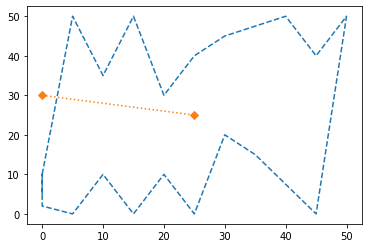

In [80]:
seg2 = Segment(Point(0,30), Point(25,25))
plt.plot(xs, ys, linestyle='dashed')
x2 = [seg2.start.x, seg2.end.x]
y2 = [seg2.start.y, seg2.end.y]
plt.plot(x2, y2, linestyle="dotted", marker="D")
inter_seg_pol(seg2, samplePolygon)


In [81]:
data_p = [[0,5],[0,10],[0,2],[5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35], [5, 50],[5,50], [0, 10]]
samplePolygon = Polygon(data_p, xcol=0, ycol=1)
seg2 = Segment(Point(0,20), Point(25,25))
samplePolygon.containsPoint(seg2.start) == True and samplePolygon.containsPoint(seg2.end) == True
seg = seg2
pol = samplePolygon

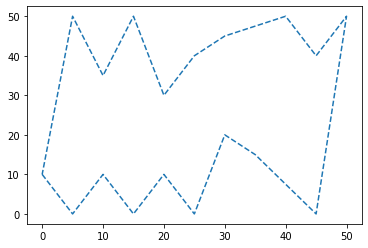

In [45]:
# Sample polygon (random points for the outline of England)
data_p_2 = [[0,10] ,[5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35], [5, 50],[5,50], [0, 10]]
sample2 = Polygon(data_p_2, xcol=0, ycol=1)
xs = [i.x for i in sample2]
ys = [i.y for i in sample2]
plt.plot(xs, ys, linestyle='dashed')


In [46]:
inter_seg_pol(seg1, sample2)

Segment with start Point(x=0.00, y=20.00) and end Point(x=0.00, y=30.00).
1 if
2 if
3 if

The intersection length is: 10.00


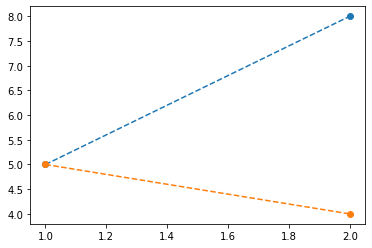

True

In [47]:
segt1 = Segment(Point(1,5), Point(2,8))
segt2 = Segment(Point(1,5), Point(2,4))
pSS(segt1, segt2)
check_touch(segt1, segt2)

In [48]:
pi = [Point(x=29.58, y=23.14), Point(x=11.00, y=22.00), Point(x=60.00, y=25.00), Point(x =11.00, y = 25)]

In [49]:
pointgroup = pi
n = len(pi)
xlist = []
ylist = []
for i in range(0, n):
    xlist.append(pointgroup[i].x)
    ylist.append(pointgroup[i].y)
xy = pd.DataFrame()
xy['x'] = xlist
xy['y'] = ylist
xy.sort_values(by=['x', 'y'], inplace = True)
xy.reset_index(drop = True, inplace = True)
xy
pointgroup_sorted = []
for i in range(0,n):
    pointgroup_sorted.append(Point(xy['x'][i], xy['y'][i]))
pointgroup_sorted

[Point(x=11.00, y=22.00),
 Point(x=11.00, y=25.00),
 Point(x=29.58, y=23.14),
 Point(x=60.00, y=25.00)]